# Doctor's consultation fee

#### We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.? This is the hackathon that lets you do that.

#### FEATURES:

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaeous_Info: Extra information about the doctor

Fees: Fees charged by the doctor

Place: Area and the city where the doctor is located.

In [212]:
#importing required libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [213]:
#reading the csv file
df=pd.read_csv('doctor_consultaion_train.csv',sep='	')
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [214]:
#checking the columns of dataset
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

There are 7 columns in total they are 'Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'

In [215]:
#checking the dimensions of dataset
df.shape

(5961, 7)

There are 5961 records(rows) and 7 columns

In [216]:
#checking the datatype of each column
df.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

only "fees" are integer type rest of the columns are object type

In [217]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [218]:
#checking null values
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

There are null values in "Rating", "Place" and  "Miscellaneous_Info"

In [219]:
#checking the unique values in each column
df.nunique()

Qualification         1420
Experience              64
Rating                  51
Place                  877
Profile                  6
Miscellaneous_Info    2998
Fees                    40
dtype: int64

In [220]:
#checking various profiles
df['Profile'].value_counts()

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

There are 1397 Dentists, 1173 General medicine ,1034 Dermatologists, 843 homepaths , 786 Ayurveda , 728 ENT specialists

# Filling the null values

In [221]:
#filling NaN values in Place column with the most frequent value
df["Place"].fillna('HSR Layout, Bangalore',inplace=True) 

In [222]:
df["Place"].isnull().sum()

0

In [223]:
#filling NaN values in Rating
df['Rating'].fillna("00%",inplace=True)

In [224]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                   0
Place                    0
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

# EDA

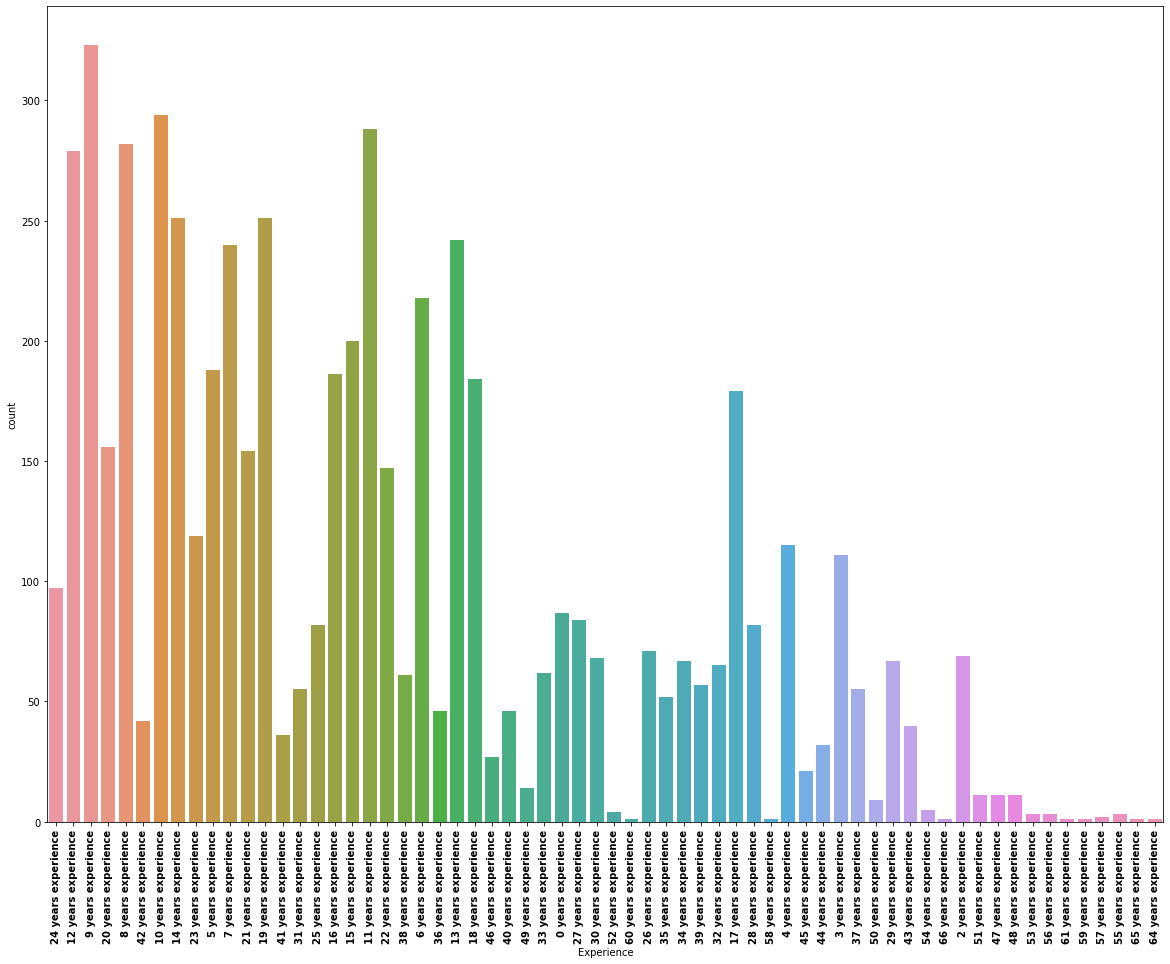

In [225]:
plt.figure(figsize=(20,15))
sns.countplot(df["Experience"])
plt.xticks(rotation=90,weight='bold')
plt.show()

#### observation

323 the doctors had 9 years of experience which recorded the highest count

maximum years of experience was of 66 years which only 1 doctor had

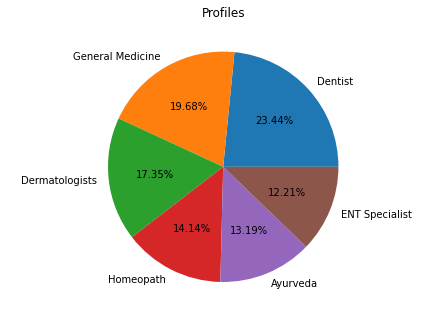

In [226]:
#profile distribution
fig=plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
profiles =['Dentist','General Medicine','Dermatologists', 'Homeopath', 'Ayurveda','ENT Specialist']
counts =[1397,1173,1034,843,786,728]
ax.pie(counts,labels=profiles,autopct='%1.2f%%') # The label will be placed inside the wedge, format=fmt%pct.
plt.title("Profiles")
plt.show()

#### observation

Thus most of doctors were Dentist

ENT specialist had the minimum distribution

After dentist most of them were Genreal Medicine

Dermatologits were 17.35

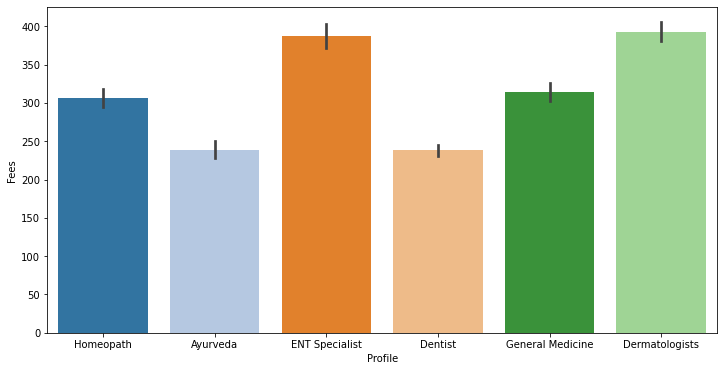

In [227]:
#relationship between fees and profiles
plt.figure(figsize=(12,6))
sns.barplot(y="Fees",x="Profile",palette='tab20',data=df)
plt.show()

#### observation

The consultation fees were maximum for Dermatologists and ENT Specialist (approximately 380)

Homeopath doctors and General Medicines had moderate consultation fees

Ayurveda and dentist has the least/minimun consultation fee


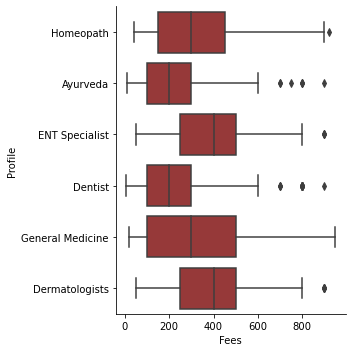

In [228]:
sns.catplot(x='Fees', y='Profile', data=df,kind='box',color='brown')
plt.show()

#### Observations:

The consulation fees for GEneral medicine  has no outliers


Ayurveda and dentist shows some exceptions(outliers)

maximum fee for homeopath was about 800

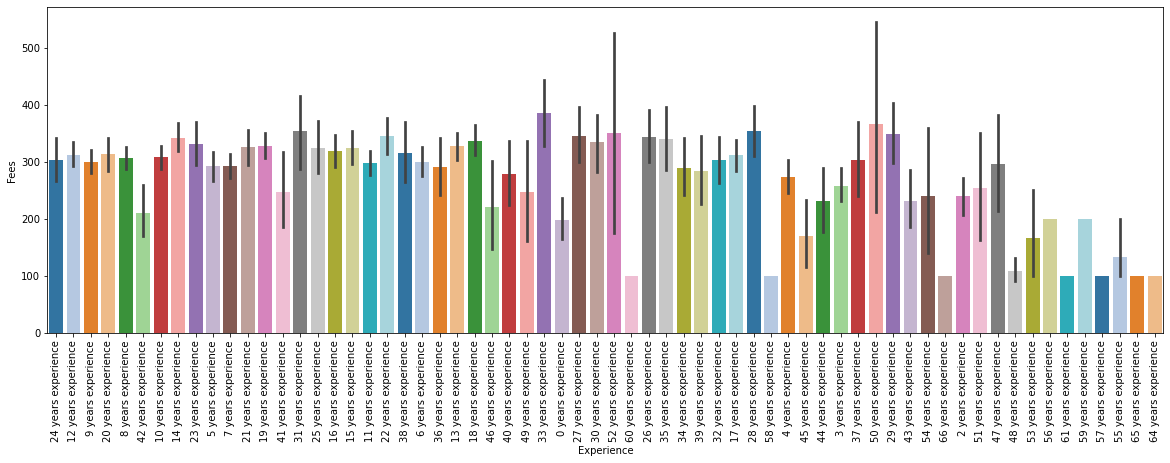

In [229]:
#Rexperience v/s Fees
plt.figure(figsize=(20,6))
sns.barplot(y="Fees",x="Experience",palette='tab20',data=df)
plt.xticks(rotation=90)
plt.show()

#### Observations

Doctors with 50 and 52 years of experience had the maximum consultation fees

doctors with 31 and 33 years of experience aslo had high fees

doctors with 60 years of experience had less few


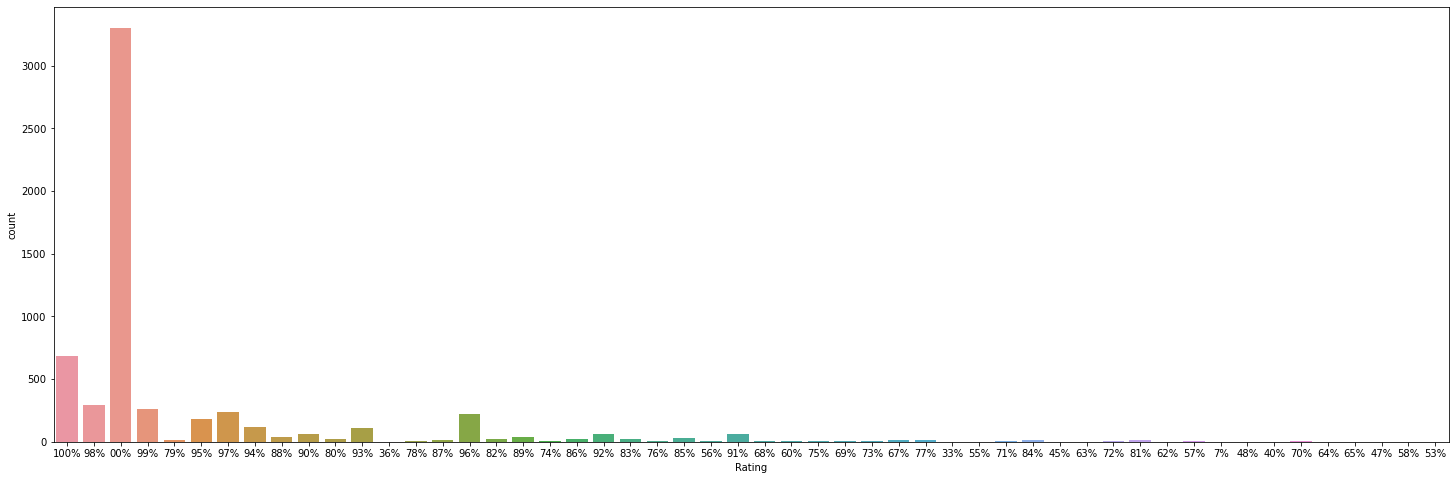

In [230]:
#counting the ratings
plt.figure(figsize=(25,8))
sns.countplot(df['Rating'])
plt.show()

#### Observations

684 doctors had 100% ratings

doctors with 99, 97 , 96% ratings were also present 

The 00% ratings are the null values that were filled and are maximum

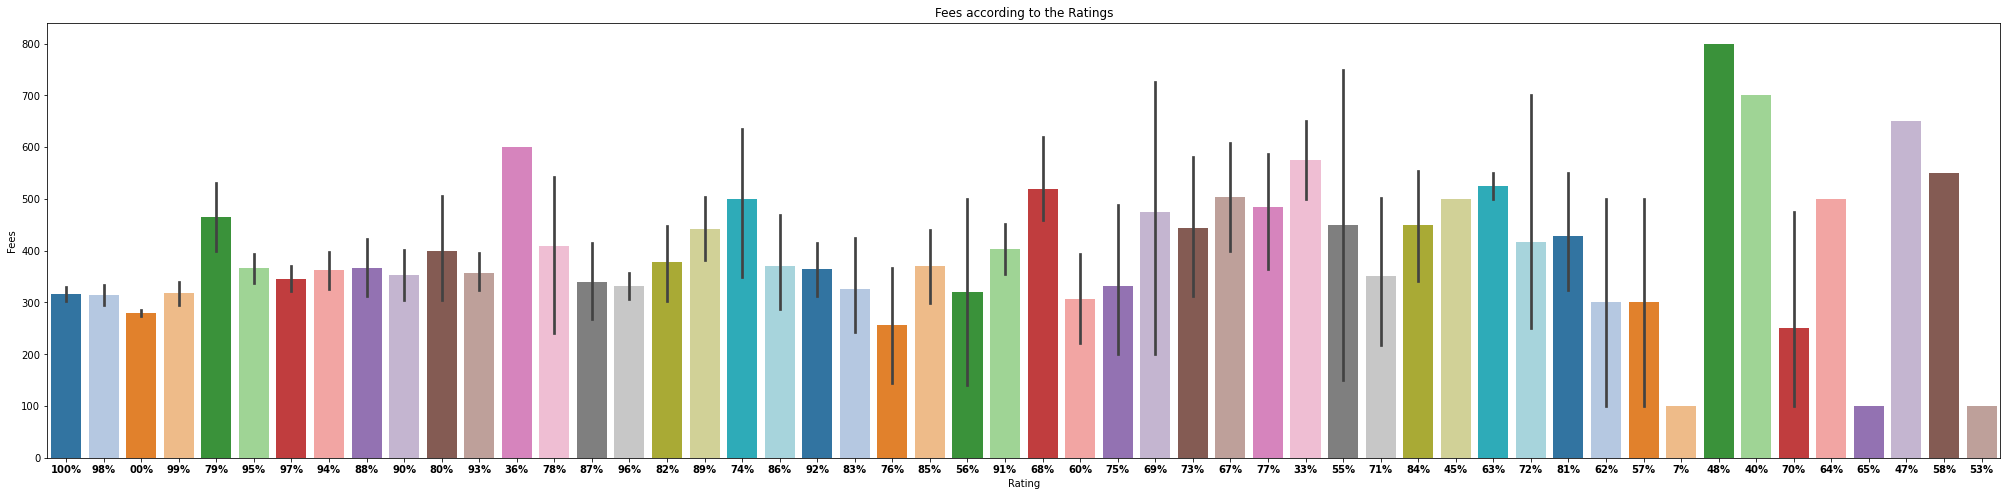

In [231]:
#fees and ratings
plt.figure(figsize=(35,8))
sns.barplot(y="Fees",x="Rating",palette='tab20',data=df)
plt.xticks(weight='bold')
plt.title("Fees according to the Ratings")
plt.show()

#### observations

Maximum doctors had 48% ratings

Doctors with 55% and 48% had higher fees 

doctors that were rated 74% had fees from 300 to 600 

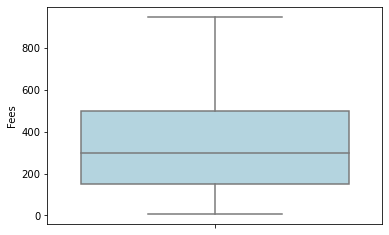

In [232]:
#checking outliers in Fees
sns.boxplot(df["Fees"],color='lightblue',orient='v')
plt.show()

#### Observations:

There are no outliers in the Column

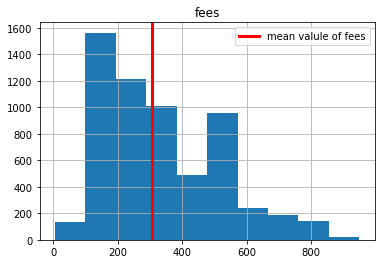

In [233]:
#distribution of fees with its mean value
df["Fees"].hist(bins=10)
mean_value=np.mean(df['Fees'])
plt.axvline(mean_value,linewidth=3,color='r',label="mean valule of fees")
plt.title("fees")
plt.legend()
plt.show()

#### Observation:

The maximum fees were Rs 950

Minimum Fees were 5

The red line indicates mean whose value is 307.94

for fees between 100 to 200 the records are high

Very few doctors had consultation fees above 900

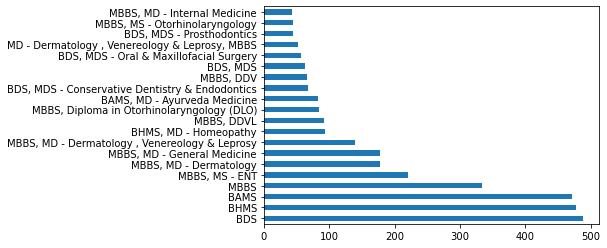

In [234]:
#plotting the qualification for top 20 rows
df['Qualification'].value_counts()[:20].plot(kind='barh')
plt.show()

#### Observations

Most of the doctors had a degree in BDS , BHMS and BAMS

The doctors with degrees as MBBS,MD-Internal Medicine ,MBBS,MS-Otorhinolaryngology and BDS,MDS-prosthodontics are equal in number

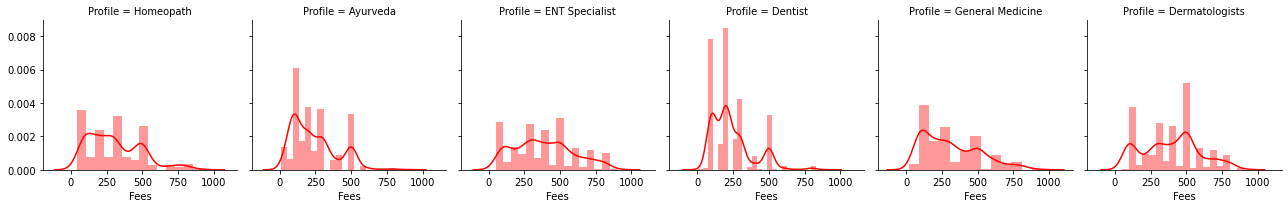

In [235]:
#exploring fees v/s profile via FaceGrid
facet=sns.FacetGrid(df,col='Profile')
facet.map(sns.distplot,'Fees',color='r')
plt.show()

#print(df.groupby('Profile')[Fees].skew())

#### observations

The skewness is as follows:
    
Ayurveda            0.905472

Dentist             1.320108

Dermatologists      0.156829

ENT Specialist      0.318491

General Medicine    0.720336

Homeopath           0.790790

# Feature engineering

In [236]:
df[['Rating','Miscellaneous_Info']]

,Rating,Miscellaneous_Info
0,100%,"100% 16 Feedback Kakkanad, Ernakulam"
1,98%,"98% 76 Feedback Whitefield, Bangalore"
2,00%,NaN
3,00%,"Bannerghatta Road, Bangalore ₹250 Available on..."
4,100%,"100% 4 Feedback Keelkattalai, Chennai"
...,...,...
5956,98%,"98% 45 Feedback Basavanagudi, Bangalore"
5957,00%,NaN
5958,97%,"97% 11 Feedback Greater Kailash Part 2, Delhi"
5959,90%,General Medical Consultation Viral Fever Treat...


#### observation

we can see that the miscellaneous_info column is similar to Rating.hence we can drop it as it conveys same information

In [237]:
#dropping the column
df.drop(['Miscellaneous_Info'],axis=1,inplace=True)

In [238]:
#check if the column is dropped
df.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,00%,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,"BSc - Zoology, BAMS",12 years experience,00%,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,250


#### splitting the qualification column as qual1 ,qual 2 and qual 3

In [239]:
#splitting qualification
df['Qual_1'] = df['Qualification'].str.split(',').str[0]
df['Qual_2'] = df['Qualification'].str.split(',').str[1]
df['Qual_3'] = df['Qualification'].str.split(',').str[2]

#drop original
df.drop(['Qualification'],axis=1,inplace=True)
df.head()

,Experience,Rating,Place,Profile,Fees,Qual_1,Qual_2,Qual_3
0,24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,100,BHMS,MD - Homeopathy,NaN
1,12 years experience,98%,"Whitefield, Bangalore",Ayurveda,350,BAMS,MD - Ayurveda Medicine,NaN
2,9 years experience,00%,"Mathikere - BEL, Bangalore",ENT Specialist,300,MBBS,MS - Otorhinolaryngology,NaN
3,12 years experience,00%,"Bannerghatta Road, Bangalore",Ayurveda,250,BSc - Zoology,BAMS,NaN
4,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,250,BAMS,NaN,NaN


In [240]:
df.isnull().sum()

Experience       0
Rating           0
Place            0
Profile          0
Fees             0
Qual_1           0
Qual_2        1962
Qual_3        4590
dtype: int64

In [241]:
#filling Nan in quals with most frequnt values
df['Qual_1'].fillna('MBBS',inplace = True)
df['Qual_2'].fillna('MS - ENT',inplace = True)

#### as qual 3 have multiple Nan values we shall drop this feature

In [242]:
df.drop(['Qual_3'],axis=1,inplace=True)

#### splitting the Experience column to make it only a numeric column 

In [243]:
#splitting the experience column
df['Experience'] = df['Experience'].str.split().str[0] #save only str 0
df.head()

,Experience,Rating,Place,Profile,Fees,Qual_1,Qual_2
0,24,100%,"Kakkanad, Ernakulam",Homeopath,100,BHMS,MD - Homeopathy
1,12,98%,"Whitefield, Bangalore",Ayurveda,350,BAMS,MD - Ayurveda Medicine
2,9,00%,"Mathikere - BEL, Bangalore",ENT Specialist,300,MBBS,MS - Otorhinolaryngology
3,12,00%,"Bannerghatta Road, Bangalore",Ayurveda,250,BSc - Zoology,BAMS
4,20,100%,"Keelkattalai, Chennai",Ayurveda,250,BAMS,MS - ENT


#### splitting the place column as area and city


In [244]:
#split
df['locality']=df['Place'].str.split(',').str[0]
df['City']=df['Place'].str.split(',').str[1]

#dropping place column as it is of no use now
df.drop(['Place'],axis=1,inplace=True)
df.head()

,Experience,Rating,Profile,Fees,Qual_1,Qual_2,locality,City
0,24,100%,Homeopath,100,BHMS,MD - Homeopathy,Kakkanad,Ernakulam
1,12,98%,Ayurveda,350,BAMS,MD - Ayurveda Medicine,Whitefield,Bangalore
2,9,00%,ENT Specialist,300,MBBS,MS - Otorhinolaryngology,Mathikere - BEL,Bangalore
3,12,00%,Ayurveda,250,BSc - Zoology,BAMS,Bannerghatta Road,Bangalore
4,20,100%,Ayurveda,250,BAMS,MS - ENT,Keelkattalai,Chennai


#### splitting the rating column

In [245]:
df['Rating'] = df['Rating'].str.split('%').str[0] #save as str 0
df.head()

,Experience,Rating,Profile,Fees,Qual_1,Qual_2,locality,City
0,24,100,Homeopath,100,BHMS,MD - Homeopathy,Kakkanad,Ernakulam
1,12,98,Ayurveda,350,BAMS,MD - Ayurveda Medicine,Whitefield,Bangalore
2,9,00,ENT Specialist,300,MBBS,MS - Otorhinolaryngology,Mathikere - BEL,Bangalore
3,12,00,Ayurveda,250,BSc - Zoology,BAMS,Bannerghatta Road,Bangalore
4,20,100,Ayurveda,250,BAMS,MS - ENT,Keelkattalai,Chennai


In [246]:
#changing data types
df.dtypes

Experience    object
Rating        object
Profile       object
Fees           int64
Qual_1        object
Qual_2        object
locality      object
City          object
dtype: object

#### Changing the data type for "Experience" and "Rating"

In [247]:
#changing data type from object to float
df['Experience']=df['Experience'].astype('int64')
df['Rating'] = df['Rating'].astype('int64') 
#check if the data types are changed
df.dtypes

Experience     int64
Rating         int64
Profile       object
Fees           int64
Qual_1        object
Qual_2        object
locality      object
City          object
dtype: object

Thus we can see the data type for experience and Ratings is changed from object to int

In [248]:
#filling NaN values in Rating
df['Rating'].replace({00:97.0},inplace=True) #97=median

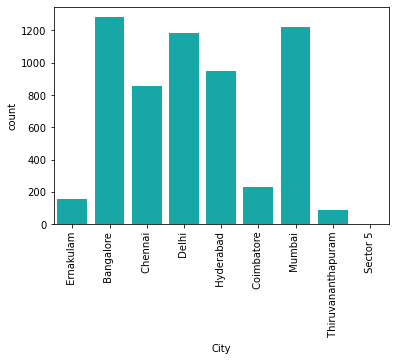

In [249]:
#visualizations of city
sns.countplot(df['City'],color='c')
plt.xticks(rotation=90)
plt.show()


#### Observations

Most of the records are taken from Banglore, Mumbai and Delhi

Hydrebad had 951 records 

chennai had 855 records

sector 5 had the least records

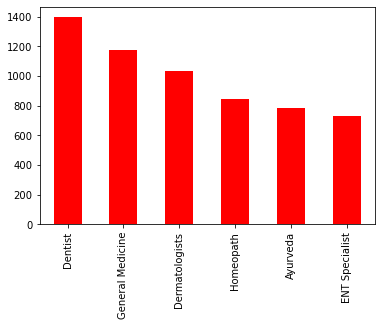

In [250]:
df['Profile'].value_counts().plot(kind='bar',color='r')
plt.show()

The highesh profile was dentist then general medicine ,dermatologist

the least were ENT Specialist

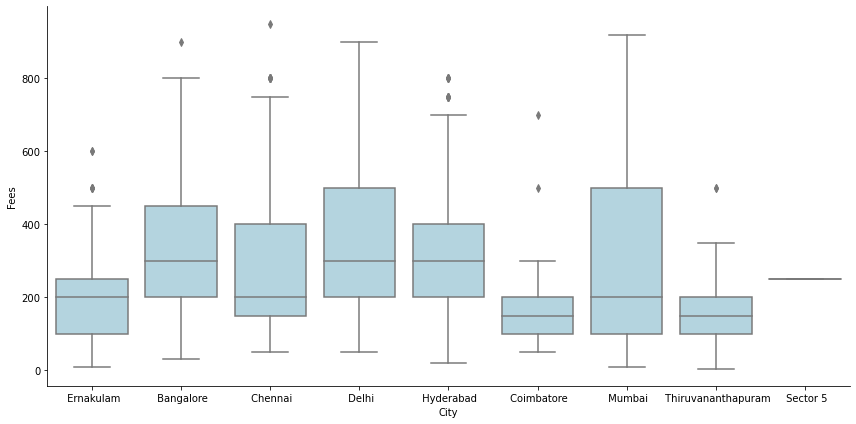

In [251]:
#view the fees charged according to the city
sns.catplot(x='City', y='Fees', data=df, kind='box',aspect=2,height=6,color='lightblue')
plt.show()

#### observations

Mumbai and delhi have no outliers and have the maximum consultation fees 

sector 5 records are the  least

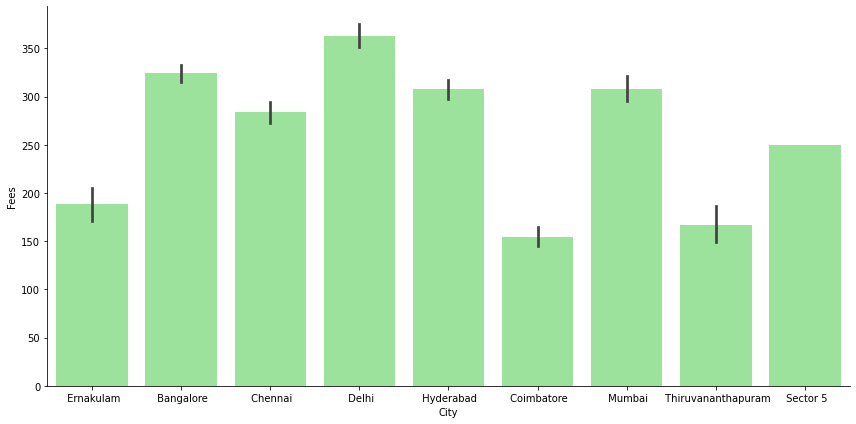

In [252]:
#view the fees charged according to the city
sns.catplot(x='City', y='Fees', data=df, kind='bar',aspect=2,height=6,color='lightgreen')
plt.show()

#### obseravtions

emakulam had fees upto 180

Banglore had fee upto 325

Chennai had fees upto 270

Delhi had fees upto 360 which were the highest

Unknown places had the least fees

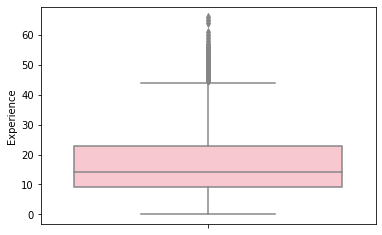

In [253]:
#boxplot of experience
sns.boxplot(df['Experience'],orient='v',color='pink')
plt.show()

#### Observation

There are outliers present in the experience column

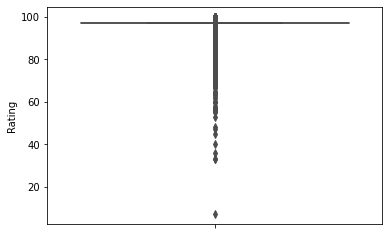

In [254]:
#boxplot of experience
sns.boxplot(df['Rating'],orient='v',color='orange')
plt.show()

#### Observation

Maximum rating were 100 and the least were 0

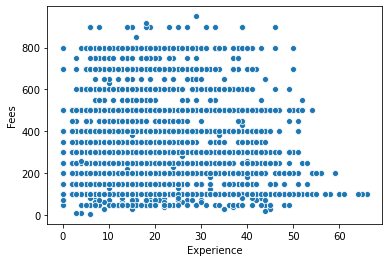

In [255]:
#experience v/s fees
sns.scatterplot(x='Experience',y='Fees',data=df)
plt.show()

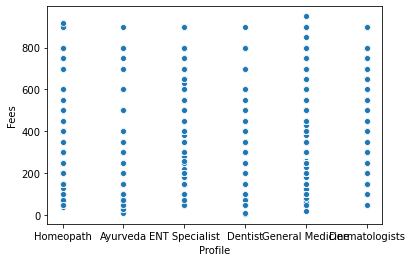

In [256]:
#profile v/s fees
sns.scatterplot(x='Profile',y='Fees',data=df)
plt.show()

The graph shows continous increasing trend

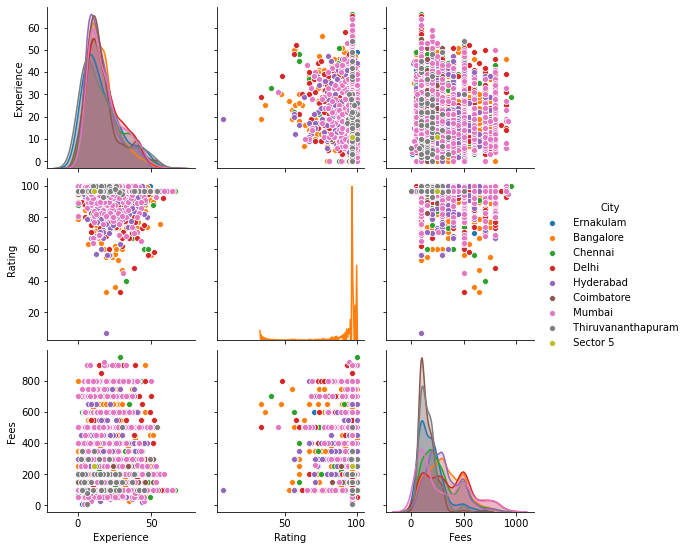

In [257]:
sns.pairplot(df,kind="scatter",hue="City")
plt.show()

#### Observations

Mumbai city has the most experienced doctors and acheived good Ratings

Consultation fees in chennai were really high

Delhi hospitals had high Fees

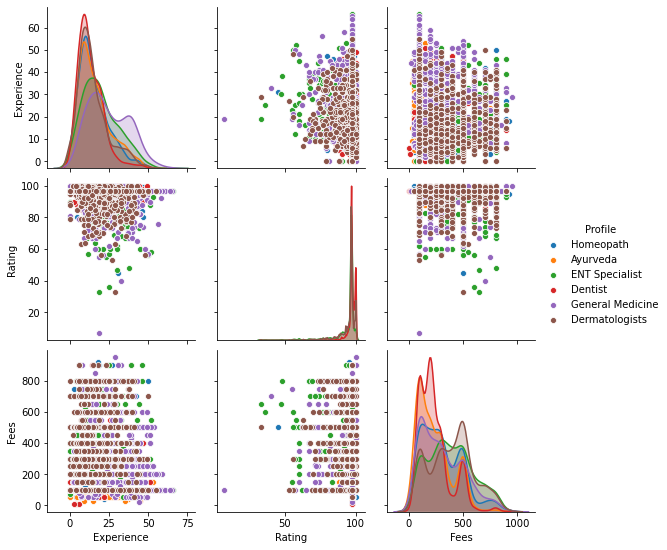

In [258]:
#relationship between profiles and other features with respect to profiles
sns.pairplot(df,kind="scatter",hue="Profile")
plt.show()

#### Observations

Ratings for Dermatologists are high 

ENt specialists have very low ratings

Experienced Dermatoligts have high consulation fees

The better the ratings higher the cost of consultation

Dentist shows more experience as compared to others

#### checking if there are any null values in the new features

In [259]:
#checking nulls
df.isnull().sum()

Experience    0
Rating        0
Profile       0
Fees          0
Qual_1        0
Qual_2        0
locality      0
City          1
dtype: int64

In [260]:
#filling NaN values in city
df['City']=df["City"].fillna(df['City'].mode()[0])

In [261]:
#recheck
df['City'].isnull().sum()

0

#### Therefore all our NULL values are treated and we can move ahead

# Statistical Analysis


In [262]:
#checking the correlation of features with target
df.corr()

,Experience,Rating,Fees
Experience,1.000000,-0.169021,0.002117
Rating,-0.169021,1.000000,-0.123751
Fees,0.002117,-0.123751,1.000000


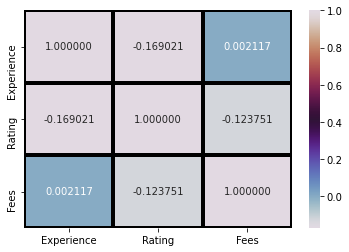

In [263]:
#visualizing the correlation
sns.heatmap(df.corr(),annot=True,cmap='twilight',linecolor='black',linewidth=3,fmt='f')
plt.show()

#### observations

Ratings have a positive correlation  of 0.15 with the target variable

Experience have a very weak correlation of 0.0021 with target variable

In [264]:
#statistical summary
df.describe()

,Experience,Rating,Fees
count,5961.000000,5961.000000,5961.000000
mean,17.303976,95.948834,307.944640
std,11.142798,5.373459,190.920373
min,0.000000,7.000000,5.000000
25%,9.000000,97.000000,150.000000
50%,14.000000,97.000000,300.000000
75%,23.000000,97.000000,500.000000
max,66.000000,100.000000,950.000000


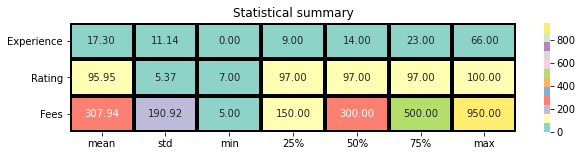

In [265]:
#visualizing statistical summary
plt.figure(figsize=(10,2))
sns.heatmap(df.describe()[1:].transpose(),annot=True,cmap='Set3',linecolor='black',linewidth=3,fmt='.2f')
plt.title("Statistical summary")
plt.show()

#### observations

1)Experience:
    
    min=0.00
    
    max=66.00
    
    mean=17.30
    
    std_dev=11.14
    
2)Ratings:
    
    min=7.00
    
    max=100
    
    mean=95.95
    
    std_dev=5.37

In [266]:
df.head()

,Experience,Rating,Profile,Fees,Qual_1,Qual_2,locality,City
0,24,100.0,Homeopath,100,BHMS,MD - Homeopathy,Kakkanad,Ernakulam
1,12,98.0,Ayurveda,350,BAMS,MD - Ayurveda Medicine,Whitefield,Bangalore
2,9,97.0,ENT Specialist,300,MBBS,MS - Otorhinolaryngology,Mathikere - BEL,Bangalore
3,12,97.0,Ayurveda,250,BSc - Zoology,BAMS,Bannerghatta Road,Bangalore
4,20,100.0,Ayurveda,250,BAMS,MS - ENT,Keelkattalai,Chennai


#### Label encoder

In [267]:
#label encoding the features:
from sklearn.preprocessing import LabelEncoder
list1=['Profile','Qual_1','Qual_2','locality','City']
Le=LabelEncoder()
for i in list1:
    df[i]=Le.fit_transform(df[i])
    
#check the encoded data
df.head()

,Experience,Rating,Profile,Fees,Qual_1,Qual_2,locality,City
0,24,100.0,5,100,8,252,296,4
1,12,98.0,0,350,5,241,855,0
2,9,97.0,3,300,79,334,452,0
3,12,97.0,0,250,12,7,68,0
4,20,100.0,0,250,5,425,335,1


#### Data assignmnet

In [268]:
#assigning features to x
x=df.drop(["Fees"],axis=1)
x.sample()

,Experience,Rating,Profile,Qual_1,Qual_2,locality,City
299,8,97.0,5,8,425,161,3


In [269]:
#checking skewness of the data
x.skew()

Experience    0.991089
Rating       -5.257248
Profile       0.108803
Qual_1        0.068299
Qual_2       -0.616841
locality      0.121186
City          0.052844
dtype: float64

There is no much skewness in the data

the highest skewness can be observed in Rating

In [270]:
#assigning Target
y=df["Fees"]
y.sample()

5596    70
Name: Fees, dtype: int64

#### Treating skewness

In [271]:
from sklearn.preprocessing import StandardScaler,power_transform
x['Rating']=power_transform(x[['Rating']],method='yeo-johnson')

In [272]:
#scailing the values
sc=StandardScaler()
x=sc.fit_transform(x)

#### finding best random state for data split

In [273]:
#finding best random state
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

best_rstate=0
accu=0

for i in range(0,400):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    kn=KNeighborsClassifier()
    kn.fit(x_train,y_train)
    y_pred=kn.predict(x_test)
    tempaccu=accuracy_score(y_test,y_pred)
   
    
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i
              
print('Best accuracy is ',(accu*100),'found on random state',(best_rstate)) 
print("cross validation score is ",cross_val_score(kn,x,y,cv=5).mean()*100)

Best accuracy is  27.32606873428332 found on random state 272
cross validation score is  23.48620588781314


In [274]:
#using the best random state
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=21)

In [275]:
#import required libraries/packages

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier


In [276]:
#using for loop to evaluate all classification algorithms
models=[DecisionTreeClassifier(),KNeighborsClassifier(),SVC(),GaussianNB()]

for i in models:
    i.fit(x_train,y_train)
    pred_y=i.predict(x_test)
    print("for",i,"algorithm")
    print(f"accuracy score is {accuracy_score(y_test,pred_y)*100}")
    crossval=cross_val_score(i,x,y,cv=5).mean()*100
    print("cross_validation score=",crossval)
    print('\n')

for DecisionTreeClassifier() algorithm
accuracy score is 25.901089689857503
cross_validation score= 23.77128608156078


for KNeighborsClassifier() algorithm
accuracy score is 25.73344509639564
cross_validation score= 23.48620588781314


for SVC() algorithm
accuracy score is 27.15842414082146
cross_validation score= 27.04250746806033


for GaussianNB() algorithm
accuracy score is 9.052808046940486
cross_validation score= 9.629212914259352




#### Ensemble models

In [277]:
models=[AdaBoostClassifier(),GradientBoostingClassifier(),RandomForestClassifier(),KNeighborsClassifier()]

for i in models:
    i.fit(x_train,y_train)
    pred_y=i.predict(x_test)
    print("for",i,"algorithm")
    print(f"accuracy score is {accuracy_score(y_test,pred_y)*100}")
    crossval=cross_val_score(i,x,y,cv=5).mean()*100
    print("cross_validation score=",crossval)
    print('\n')

for AdaBoostClassifier() algorithm
accuracy score is 22.632020117351214
cross_validation score= 22.110366961638643


for GradientBoostingClassifier() algorithm
accuracy score is 30.67896060352054
cross_validation score= 28.686493358911324


for RandomForestClassifier() algorithm
accuracy score is 27.996647108130762
cross_validation score= 28.065814567077524


for KNeighborsClassifier() algorithm
accuracy score is 25.73344509639564
cross_validation score= 23.48620588781314




In [ ]:
#hypertuning for svc
from sklearn.model_selection import GridSearchCV
svc=SVC()
parameters={"kernel":["linear","poly","rbf","sigmoid"],"gamma":["scale","auto"],"random_state":[10,20,33,42]}
                      
clf=GridSearchCV(svc,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

#### NOTE:all the parameters used have been hypertuned and cross checked the gridsearch cv code is not executed again due to large time it consumes

In [279]:
#using the best parameter 
svc=SVC(kernel='rbf',random_state=63,gamma="auto")
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
svc_score=accuracy_score(y_test,y_pred)*100
print("accuracy",svc_score)
svc_crossval=cross_val_score(svc,x,y,cv=5).mean()*100
print("cross_validation score=",svc_crossval)
print("\n")
print("confusion matrix \n",confusion_matrix(y_test,y_pred))
print("\n")
print("classification report\n",classification_report(y_test,y_pred))


accuracy 27.15842414082146
cross_validation score= 27.025728944570393


confusion matrix 
 [[  0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    1   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  14   0   1   0   0   0   0   0   0   0   0
    1   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 184   0  46   0   0   8   0   0   0   0   0
   38   0   0   0   0   0   0   0   0]
 [  0

# Random forest classifier

In [280]:
#using the best parameter obtained above
rfc=RandomForestClassifier(criterion='entropy',max_features="auto",n_estimators=100)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
rfc_score=accuracy_score(y_test,y_pred)*100
print("accuracy",rfc_score)
rfc_crossval=cross_val_score(rfc,x,y,cv=5).mean()*100
print("cross_validation score=",rfc_crossval)
print("\n")
print("confusion matrix \n",confusion_matrix(y_test,y_pred))
print("\n")
print("classification report\n",classification_report(y_test,y_pred))


accuracy 28.415758591785416
cross_validation score= 27.713507766220175


confusion matrix 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   1   0   0   0   0   0   0   0   0]
 [  0   0   0   2   0   0   0   8   0   0   0   1   2   0   0   0   0   1
    0   2   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0
    0   1   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   5   1   1   0 126   5  46   0   7  22   1   0  10   0   2
    0  36   0  

# Comparing both the models

In [281]:
summary=pd.DataFrame({'Algorithm':['SVC','Random Forest'],
                    'R2 score':[svc_score,rfc_score],
                     'Cross validataion':[svc_crossval,rfc_crossval]})
summary

,Algorithm,R2 score,Cross validataion
0,SVC,27.158424,27.025729
1,Random Forest,28.415759,27.713508


#### Thus the Linear rergression shows good performance and we shall use it as our final model

# Saving the best model

In [282]:
#save the model as pickle/obj file
import pickle
filename="doctors-consultation-fee.pkl"
pickle.dump(rfc,open(filename,'wb'))

In [283]:
actual=np.array(y_test)

In [284]:
predicted=np.array(rfc.predict(x_test))

In [285]:
df_com=pd.DataFrame({"actual values":actual,"predicted values":predicted})
df_com

,actual values,predicted values
0,250,300
1,500,500
2,200,200
3,300,500
4,50,100
...,...,...
1188,400,800
1189,150,500
1190,400,300
1191,200,200


# Test Data

In [286]:
#reading the csv file
df_test=pd.read_csv('doctor_test.csv',sep='	')
df_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [287]:
#checking the columns of dataset
df_test.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info'],
      dtype='object')

There are 6 columns in total they are 'Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info'

In [288]:
#checking the dimensions of dataset
df_test.shape

(1987, 6)

There are 1987 records(rows) and 6 columns

In [289]:
#checking the datatype of each column
df_test.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
dtype: object

All the columns are object type

In [290]:
#checking null values
df_test.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

There are null values in "Rating", "Place" and "Miscellaneous_Info"

In [291]:
#checking the unique values in each column
df_test.nunique()

Qualification          630
Experience              57
Rating                  36
Place                  592
Profile                  6
Miscellaneous_Info    1084
dtype: int64

In [292]:
#checking various profiles
df_test['Profile'].value_counts()

General Medicine    444
Dentist             441
Dermatologists      339
Homeopath           277
Ayurveda            251
ENT Specialist      235
Name: Profile, dtype: int64

There are 441 Dentists, 444 General medicine ,339 Dermatologists, 277 homepaths , 251 Ayurveda , 235 ENT specialists

# Filling the null values

In [293]:
#filling NaN values in Place column with the most frequent value
df_test["Place"].fillna('HSR Layout, Bangalore',inplace=True) 

In [294]:
#filling NaN values in Rating
df_test['Rating'].fillna("00%",inplace=True)

In [295]:
df_test.isnull().sum()

Qualification           0
Experience              0
Rating                  0
Place                   0
Profile                 0
Miscellaneous_Info    834
dtype: int64

In [296]:
#dropping the column
df_test.drop(['Miscellaneous_Info'],axis=1,inplace=True)

In [297]:
#check if the column is dropped
df_test.head()

,Qualification,Experience,Rating,Place,Profile
0,MBBS,35 years experience,00%,"Ghatkopar East, Mumbai",General Medicine
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,00%,"West Marredpally, Hyderabad",ENT Specialist
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists
3,BAMS,0 years experience,00%,"New Ashok Nagar, Delhi",Ayurveda
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist


In [298]:
#splitting qualification
df_test['Qual_1'] = df_test['Qualification'].str.split(',').str[0]
df_test['Qual_2'] = df_test['Qualification'].str.split(',').str[1]
df_test['Qual_3'] = df_test['Qualification'].str.split(',').str[2]

#drop original
df_test.drop(['Qualification'],axis=1,inplace=True)
df_test.head()

,Experience,Rating,Place,Profile,Qual_1,Qual_2,Qual_3
0,35 years experience,00%,"Ghatkopar East, Mumbai",General Medicine,MBBS,NaN,NaN
1,31 years experience,00%,"West Marredpally, Hyderabad",ENT Specialist,MBBS,Diploma in Otorhinolaryngology (DLO),NaN
2,40 years experience,70%,"KK Nagar, Chennai",Dermatologists,MBBS,DDVL,NaN
3,0 years experience,00%,"New Ashok Nagar, Delhi",Ayurveda,BAMS,NaN,NaN
4,16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,BDS,MDS - Conservative Dentistry & Endodontics,NaN


In [299]:
df_test['Qual_1'].mode()

0    MBBS
dtype: object

In [300]:
df_test['Qual_2'].mode()

0     MD - Dermatology
dtype: object

In [301]:
#filling Nan in quals with most frequnt values
df_test['Qual_1'].fillna('MBBS',inplace = True)
df_test['Qual_2'].fillna('MD - Dermatology',inplace = True)

In [302]:
df_test.drop(['Qual_3'],axis=1,inplace=True)

In [303]:
#splitting the experience column
df_test['Experience'] = df_test['Experience'].str.split().str[0] #save str 0
df_test.sample(2)

,Experience,Rating,Place,Profile,Qual_1,Qual_2
1902,6,00%,"Vadavalli, Coimbatore",Dentist,BDS,MD - Dermatology
117,3,00%,"Bandra West, Mumbai",Dermatologists,MD - Skin & VD,MD - Dermatology


In [304]:
#split the place column
df_test['locality']=df_test['Place'].str.split(',').str[0]
df_test['City']=df_test['Place'].str.split(',').str[1]
df_test.head()


,Experience,Rating,Place,Profile,Qual_1,Qual_2,locality,City
0,35,00%,"Ghatkopar East, Mumbai",General Medicine,MBBS,MD - Dermatology,Ghatkopar East,Mumbai
1,31,00%,"West Marredpally, Hyderabad",ENT Specialist,MBBS,Diploma in Otorhinolaryngology (DLO),West Marredpally,Hyderabad
2,40,70%,"KK Nagar, Chennai",Dermatologists,MBBS,DDVL,KK Nagar,Chennai
3,0,00%,"New Ashok Nagar, Delhi",Ayurveda,BAMS,MD - Dermatology,New Ashok Nagar,Delhi
4,16,100%,"Kanakpura Road, Bangalore",Dentist,BDS,MDS - Conservative Dentistry & Endodontics,Kanakpura Road,Bangalore


In [305]:
#dropping place column as it is of no use now
df_test.drop(['Place'],axis=1,inplace=True)

In [306]:
df_test['Rating'] = df_test['Rating'].str.split('%').str[0] #save as str 0
df_test.head()

,Experience,Rating,Profile,Qual_1,Qual_2,locality,City
0,35,00,General Medicine,MBBS,MD - Dermatology,Ghatkopar East,Mumbai
1,31,00,ENT Specialist,MBBS,Diploma in Otorhinolaryngology (DLO),West Marredpally,Hyderabad
2,40,70,Dermatologists,MBBS,DDVL,KK Nagar,Chennai
3,0,00,Ayurveda,BAMS,MD - Dermatology,New Ashok Nagar,Delhi
4,16,100,Dentist,BDS,MDS - Conservative Dentistry & Endodontics,Kanakpura Road,Bangalore


In [307]:
#changing data type from object to float
df_test['Experience']=df_test['Experience'].astype('int64')
df_test['Rating'] = df_test['Rating'].astype('int64') 
#check if the data types are changed
df_test.dtypes

Experience     int64
Rating         int64
Profile       object
Qual_1        object
Qual_2        object
locality      object
City          object
dtype: object

In [308]:
df_test.isnull().sum()

Experience    0
Rating        0
Profile       0
Qual_1        0
Qual_2        0
locality      0
City          0
dtype: int64

In [309]:
#filling NaN values in Rating
df_test['Rating'].replace({00:97.0},inplace=True) #97=median

#### Label encoder

In [310]:
#label encoding the features:
from sklearn.preprocessing import LabelEncoder
list1=['Profile','Qual_1', 'Qual_2','locality', 'City']
Le=LabelEncoder()
for i in list1:
    df_test[i]=Le.fit_transform(df_test[i])

In [311]:
#check the encoded data
df_test.head()

,Experience,Rating,Profile,Qual_1,Qual_2,locality,City
0,35,97.0,4,48,243,142,6
1,31,97.0,3,48,79,577,5
2,40,70.0,2,48,28,212,1
3,0,97.0,0,1,243,373,3
4,16,100.0,1,2,157,231,0


In [312]:
df_test.skew()

Experience    0.963447
Rating       -4.235921
Profile       0.028926
Qual_1        0.013098
Qual_2       -0.458845
locality      0.044101
City          0.000822
dtype: float64

In [313]:
from sklearn.preprocessing import StandardScaler,power_transform
df_test['Rating']=power_transform(df_test[['Rating']],method='yeo-johnson')

In [314]:
sc=StandardScaler()
df_test=sc.fit_transform(df_test)

# using the saved model to predict Results

In [315]:
fitted_model=pickle.load(open("doctors-consultation-fee.pkl","rb"))

In [316]:
fitted_model

RandomForestClassifier(criterion='entropy')

In [317]:
#predict using the saved model
predictions=fitted_model.predict(df_test)

In [318]:
#predicted values
predictions=pd.DataFrame(predictions)
predictions

,0
0,150
1,500
2,600
3,250
4,300
...,...
1982,200
1983,200
1984,200
1985,200


# Conclusion

Thus i have checked the model performance using  various classification algorithms like SVC, Adaboost and Gradient Boost,RandomForest etc.

GradientBoosting Algorithm gives us best results and is used to model the train dataset .The trained model is saved

The model gives us :

accuracy= 28.4

cross_validation score= 27.7

The confuision matrix can be observed 

The saved model is then used to make predictions on the test data set

For test data is processed according to the Train data and then given to the model

#### The target can aslo be looked at as regression problem but the dataset does not work well with regression so i have performed classification here

#### Thankyou